In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import trim_mean


In [2]:
stores=pd.read_csv("Stores-checkpoint.csv")
stores.info()
stores.shape
stores.isnull().sum()
stores.duplicated()
stores.drop_duplicates(inplace=True)
store=stores.fillna('0')
store=stores.drop(index=66)
Q1 = store['Square Meters'].quantile(0.25)
Q3 = store['Square Meters'].quantile(0.75)
IQR = Q3 - Q1
store_iq = store[(store['Square Meters'] >= (Q1 - 1.5 * IQR)) & (store['Square Meters'] <= (Q3 + 1.5 * IQR))]
store_iq['z_score'] = np.abs(stats.zscore(store_iq['Square Meters']))
store_iq['z_score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


0     1.411132
1     1.288759
2     1.045072
3     1.045072
4     1.045072
        ...   
61    0.493333
62    1.045072
63    0.126214
64    0.669212
65    0.982826
Name: z_score, Length: 66, dtype: float64

In [3]:
trimmed_mean_store=trim_mean(store['Square Meters'],proportiontocut=0.1)
trimmed_mean_store

1446.0185185185185

In [4]:
store_iq.isna().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
z_score          0
dtype: int64

In [5]:
#tore_sale=pd.merge(store_iq,sale,on='StoreKey',how='inner')

In [6]:
sale=pd.read_csv('Sales-checkpoint.csv')
sale.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [7]:
sale['Delivery Date'] = pd.to_datetime(sale['Delivery Date'], errors='coerce')
sale['Order Date'] = pd.to_datetime(sale['Order Date'], errors='coerce')

In [8]:
sale['Delivery Date'] = sale['Delivery Date'].fillna(sale['Order Date'] + pd.to_timedelta(7, unit='D'))


In [9]:
sale

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-08,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-27,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [10]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [11]:
store_sale=pd.merge(store_iq,sale,on='StoreKey',how='inner')
store_sale

,StoreKey,Country,State,Square Meters,Open Date,z_score,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,ProductKey,Quantity,Currency Code
0,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,1,2016-06-01,2016-06-08,126573,284,2,AUD
1,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,2,2016-06-01,2016-06-08,126573,548,3,AUD
2,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,3,2016-06-01,2016-06-08,126573,31,1,AUD
3,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,531006,1,2016-06-14,2016-06-21,35257,775,3,AUD
4,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,584001,1,2016-08-06,2016-08-13,137865,2090,1,AUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49714,66,United States,Wyoming,840.0,1/1/2014,0.982826,2234000,5,2021-02-11,2021-02-18,1344432,1658,2,USD
49715,66,United States,Wyoming,840.0,1/1/2014,0.982826,2234000,6,2021-02-11,2021-02-18,1344432,94,7,USD
49716,66,United States,Wyoming,840.0,1/1/2014,0.982826,2239012,1,2021-02-16,2021-02-23,1831770,1010,6,USD
49717,66,United States,Wyoming,840.0,1/1/2014,0.982826,2241016,1,2021-02-18,2021-02-25,1743547,7,1,USD


In [12]:
#stores_sale['Open Date']=stores_sale['Open Date'].fillna(method='bfill')

In [13]:
#stores_sale=store_sale.fillna({
 #   'Country': "not avaliable",
  #  'State':"not avaliable",
   # 'Square Meters':store_sale['Square Meters'].mean,
    #'z_score':store_sale['z_score'].mean
#})

In [14]:
product=pd.read_csv('products-checkpoint.csv')
product.head()
#product.info()
#product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
#product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
#product.info()
#product.describe()
#product.isnull().sum()
#product.drop_duplicates()
#store_sale_product=pd.merge(store_sale,product,on='ProductKey',how='left')


,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [15]:
product.shape

(2517, 10)

In [16]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [17]:
product.columns

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')

In [18]:
product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16624\2585730537.py:1: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Price USD']=product['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16624\2585730537.py:2: SyntaxWarning: invalid escape sequence '\$'
  product['Unit Cost USD']=product['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)


In [19]:
store_sale_product=pd.merge(store_sale,product,on='ProductKey',how='inner')
store_sale_product

,StoreKey,Country,State,Square Meters,Open Date,z_score,Order Number,Line Item,Order Date,Delivery Date,...,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,1,2016-06-01,2016-06-08,...,AUD,Contoso Home Theater System 5.1 Channel M1510 ...,Contoso,Brown,224.87,489.00,203,Home Theater System,2,TV and Video
1,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,2,2016-06-01,2016-06-08,...,AUD,Proseware Screen 100in M1609 Black,Proseware,Black,87.37,190.00,305,Projectors & Screens,3,Computers
2,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,518002,3,2016-06-01,2016-06-08,...,AUD,Contoso 32GB Video MP3 Player M3200 Orange,Contoso,Orange,84.49,255.00,101,MP4&MP3,1,Audio
3,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,531006,1,2016-06-14,2016-06-21,...,AUD,Contoso Smart Battery M901 Blue,Contoso,Blue,5.29,11.50,308,Computers Accessories,3,Computers
4,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,584001,1,2016-08-06,2016-08-13,...,AUD,Contoso Water Heater 7.2GPM X1800 Blue,Contoso,Blue,488.70,1475.00,804,Water Heaters,8,Home Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49714,66,United States,Wyoming,840.0,1/1/2014,0.982826,2234000,5,2021-02-11,2021-02-18,...,USD,Contoso DVD 7-Inch Player Portable E200 White,Contoso,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
49715,66,United States,Wyoming,840.0,1/1/2014,0.982826,2234000,6,2021-02-11,2021-02-18,...,USD,WWI Stereo Bluetooth Headphones E1000 Black,Wide World Importers,Black,34.36,67.40,106,Bluetooth Headphones,1,Audio
49716,66,United States,Wyoming,840.0,1/1/2014,0.982826,2239012,1,2021-02-16,2021-02-23,...,USD,A. Datum Bridge Digital Camera M300 Orange,A. Datum,Orange,85.95,186.90,401,Digital Cameras,4,Cameras and camcorders
49717,66,United States,Wyoming,840.0,1/1/2014,0.982826,2241016,1,2021-02-18,2021-02-25,...,USD,Contoso 2G MP3 Player E200 Blue,Contoso,Blue,11.00,21.57,101,MP4&MP3,1,Audio


In [20]:
customer = pd.read_csv('C:\\Users\\Welcome\\dark spark mini 2\\Customers.csv',encoding='ISO-8859-1')
#customer.isna().sum()

In [21]:
#customer = pd.read_csv('C:\\Users\\Welcome\\dark spark mini 2\\Customers.csv',encoding='ISO-8859-1')
customer.head()
customer.dtypes
customer['Birthday']=pd.to_datetime(customer['Birthday'])
today = pd.to_datetime("today") 
#customer['age'] = (today.year - customer['Birthday'].dt.year)
customer.dtypes
#customer['State Code'].fillna('NotEntered',inplace=True)

#customer['age'].min()
#customer['age'].max()



CustomerKey             int64
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
dtype: object

In [22]:
store_sale_product_cust=pd.merge(store_sale_product,customer,on=['CustomerKey','State','Country'],how='inner')
store_sale_product_cust

,StoreKey,Country,State,Square Meters,Open Date,z_score,Order Number,Line Item,Order Date,Delivery Date,...,Subcategory,CategoryKey,Category,Gender,Name,City,State Code,Zip Code,Continent,Birthday
0,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,1,2018-12-01,2018-12-08,...,Televisions,2,TV and Video,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11
1,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,2,2018-12-01,2018-12-08,...,Desktops,3,Computers,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11
2,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,3,2018-12-01,2018-12-08,...,MP4&MP3,1,Audio,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11
3,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,5,2018-12-01,2018-12-08,...,Coffee Machines,8,Home Appliances,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11
4,4,Australia,Tasmania,2000.0,1/1/2010,1.045072,370008,1,2016-01-05,2016-01-12,...,Water Heaters,8,Home Appliances,Male,Thomas Luscombe,GAGEBROOK,TAS,7030,Australia,1964-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,66,United States,Wyoming,840.0,1/1/2014,0.982826,2022005,1,2020-07-14,2020-07-21,...,Refrigerators,8,Home Appliances,Male,Shawn Harris,Green River,WY,82935,North America,1962-04-22
6177,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,1,2020-08-01,2020-08-08,...,Desktops,3,Computers,Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20
6178,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,2,2020-08-01,2020-08-08,...,Boxed Games,7,Games and Toys,Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20
6179,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,3,2020-08-01,2020-08-08,...,Movie DVD,6,"Music, Movies and Audio Books",Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20


In [23]:
#store_sale_produc_cust['Delivery Date']=stores_sale_prod_cust['Birthday'].fillna(method='ffill')

In [24]:
#stores_sale_prod_cust=store_sale_prod_cust.fillna({'Gender':'not known',
 #                                                 'Name': 'not known',
  #                                                'City':'not known',
   #                                               'State Code':'not known',
    #                                              'Zip Code': 'not known',
     #                                             'Continent': 'not known',
      #                                            'age':store_sale_prod_cust['age'].mean
       #                                           })

In [25]:
exchange=pd.read_csv('Exchange_Rates-checkpoint.csv')
exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [26]:
#merged_data=pd.concat([store_sale_product_cust,exchange],axis=1)
merged_data = pd.merge(store_sale_product_cust,exchange, left_index=True, right_index=True,how='left')
#merged_data 

In [27]:
merged_data

,StoreKey,Country,State,Square Meters,Open Date,z_score,Order Number,Line Item,Order Date,Delivery Date,...,Gender,Name,City,State Code,Zip Code,Continent,Birthday,Date,Currency,Exchange
0,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,1,2018-12-01,2018-12-08,...,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11,1/1/2015,USD,1.0000
1,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,2,2018-12-01,2018-12-08,...,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11,1/1/2015,CAD,1.1583
2,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,3,2018-12-01,2018-12-08,...,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11,1/1/2015,AUD,1.2214
3,1,Australia,Australian Capital Territory,595.0,1/1/2008,1.411132,1431023,5,2018-12-01,2018-12-08,...,Male,Jaxon Rebell,TORRENS,ACT,2607,Australia,1975-10-11,1/1/2015,EUR,0.8237
4,4,Australia,Tasmania,2000.0,1/1/2010,1.045072,370008,1,2016-01-05,2016-01-12,...,Male,Thomas Luscombe,GAGEBROOK,TAS,7030,Australia,1964-01-20,1/1/2015,GBP,0.6415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,66,United States,Wyoming,840.0,1/1/2014,0.982826,2022005,1,2020-07-14,2020-07-21,...,Male,Shawn Harris,Green River,WY,82935,North America,1962-04-22,5/20/2018,CAD,1.2795
6177,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,1,2020-08-01,2020-08-08,...,Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20,5/20/2018,AUD,1.3304
6178,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,2,2020-08-01,2020-08-08,...,Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20,5/20/2018,EUR,0.8488
6179,66,United States,Wyoming,840.0,1/1/2014,0.982826,2040002,3,2020-08-01,2020-08-08,...,Female,Maximiliana Hernández,Casper,WY,82601,North America,1989-05-20,5/20/2018,GBP,0.7412


In [28]:
merged_data.isna().sum()

StoreKey          0
Country           0
State             0
Square Meters     0
Open Date         0
z_score           0
Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
ProductKey        0
Quantity          0
Currency Code     0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Gender            0
Name              0
City              0
State Code        0
Zip Code          0
Continent         0
Birthday          0
Date              0
Currency          0
Exchange          0
dtype: int64

In [29]:
today=pd.to_datetime('today')
merged_data['age']=(today.year-merged_data['Birthday'].dt.year)
merged_data['profit_margin_per']=(merged_data['Unit Price USD']-merged_data['Unit Cost USD'])/merged_data['Unit Price USD']*100

In [30]:
merged_datas=merged_data.rename(columns={
    "Square Meters":"Square_Meters", 
    "Open Date":"Open_Date", 
    "Order Number":"Order_Number", 
    "Line Item":"Line_Item", 
    "Order Date":"Order_Date", 
    "Delivery Date":"Delivery_Date",
    "Currency Code":"Currency_Code",
    "Unit Cost USD":"Unit_Cost_USD", 
    "Unit Price USD":"Unit_Price_USD",
    "State Code":"State_Code", 
    "Zip Code":"Zip_Code",
    "Product Name":"Product_Name"
})

In [31]:
#merged_data['delivery Date'] = merged_data['Order Date'] + pd.to_timedelta(merged_data['Delivery Date'], unit='D')

In [32]:
#store_sale_prod_cust['Date']=store_sale_prod_cust['Date'].fillna(method='ffill')

In [34]:
#stores_sales_prod_cust=store_sale_prod_cust.fillna({
 #   'Currency':'not known ',
  #  'Exchange':store_sale_prod_cust['Exchange'].mean
#})

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.legend import Legend

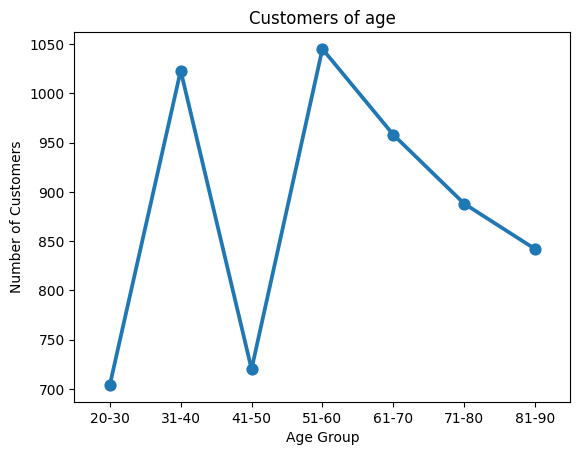

In [36]:
age_groups = pd.cut(merged_datas['age'], bins=[22, 29, 39, 49, 59, 69,79,89], labels=["20-30","31-40","41-50","51-60","61-70","71-80","81-90"])
age_dist = age_groups.value_counts()
sns.pointplot(x=age_dist.index, y=age_dist.values)
plt.title("Customers of age")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

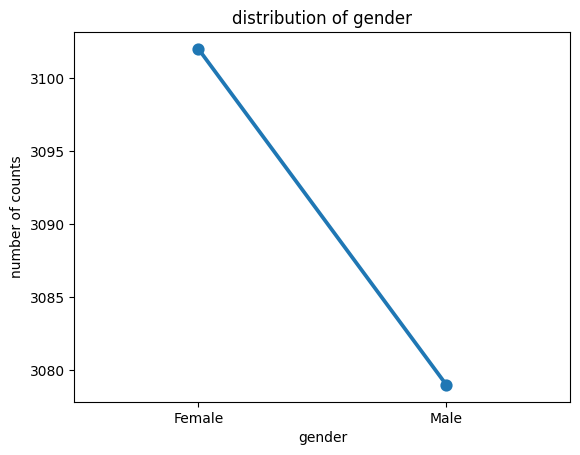

In [37]:
groupOfGender=merged_datas['Gender']
gender_count=groupOfGender.value_counts().sort_index()
sns.pointplot(x=gender_count.index,y=gender_count.values)
plt.title('distribution of gender')
plt.xlabel('gender')
plt.ylabel('number of counts')
plt.show()

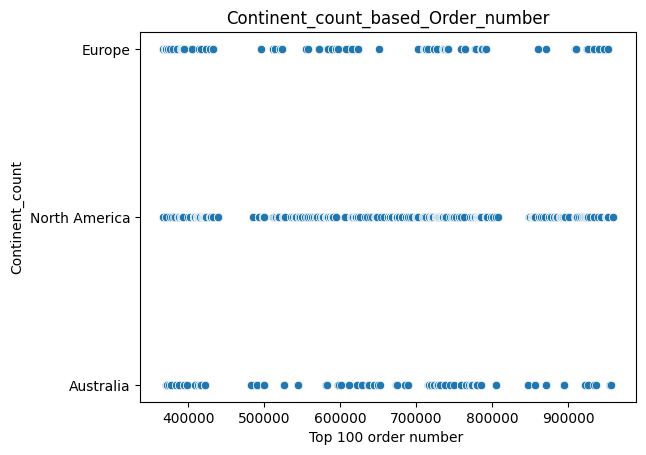

In [40]:
counts=merged_data.sort_values('Order Number',ascending=True).reset_index()
sns.scatterplot(data=counts[:1000],x='Order Number',y='Continent')
plt.title('Continent_count_based_Order_number')
plt.xlabel('Top 100 order number ')
plt.ylabel('Continent_count')
plt.show()

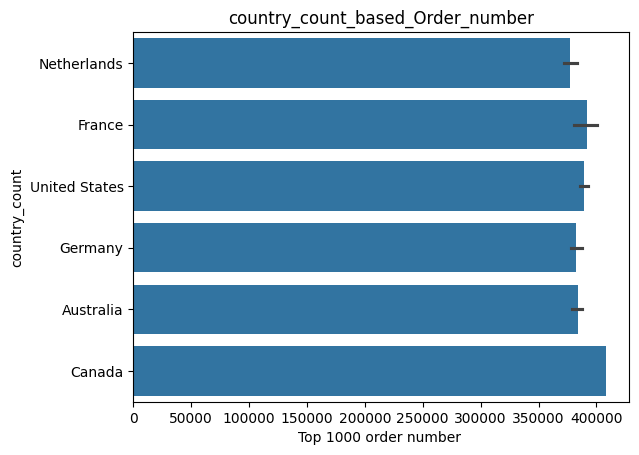

In [41]:

sns.barplot(data=counts[:100],x='Order Number',y='Country')
plt.title('country_count_based_Order_number')
plt.xlabel('Top 1000 order number ')
plt.ylabel('country_count')
plt.show()

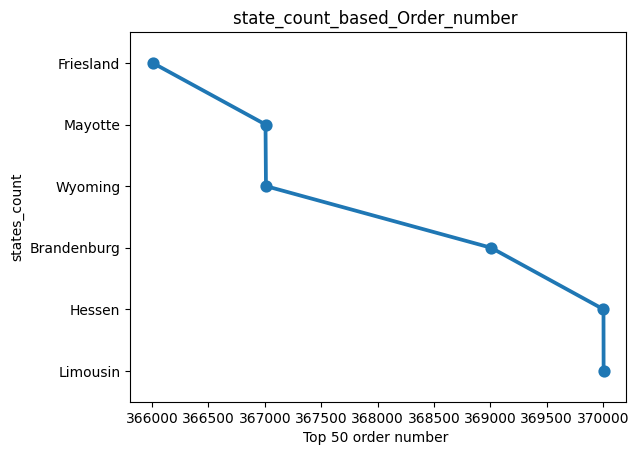

In [42]:

sns.pointplot(data=counts[:10],x='Order Number',y='State')
plt.title('state_count_based_Order_number ')
plt.xlabel('Top 50 order number ')
plt.ylabel('states_count')
plt.show()

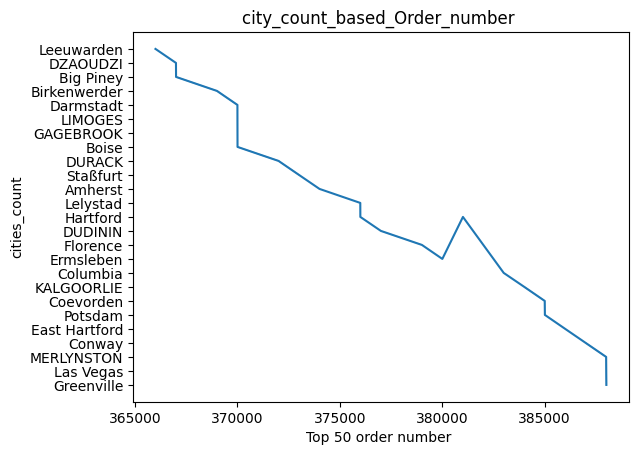

In [44]:

sns.lineplot(data=counts[:50],x='Order Number',y='City')
plt.title('city_count_based_Order_number ')
plt.xlabel('Top 50 order number ')
plt.ylabel('cities_count')
plt.show()

In [50]:
value=merged_datas['Order_Number'].mean()
value

1450293.9037372593

<function matplotlib.pyplot.show(close=None, block=None)>

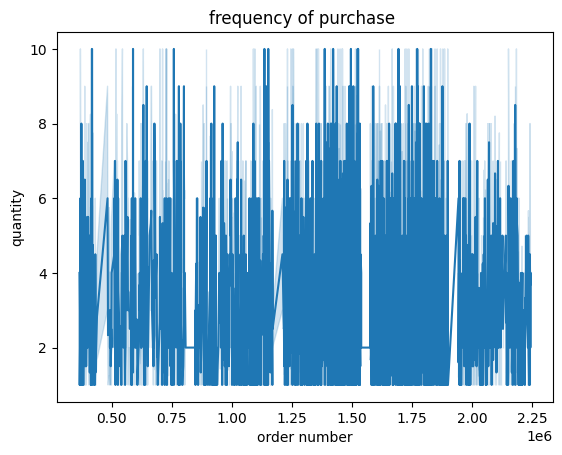

In [75]:
sns.lineplot(x='Order_Number',y='Quantity',data=merged_datas)
plt.title('frequency of purchase ')
plt.xlabel('order number')
plt.ylabel('quantity')
plt.show

In [ ]:
#stores_sales_prod_cust['Order Date'] = pd.to_datetime(stores_sales_prod_cust['Order Date'])

<Axes: xlabel='Unit_Price_USD', ylabel='Open_Date'>

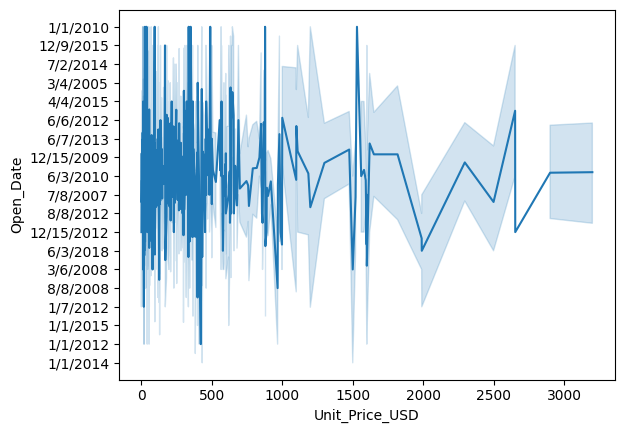

In [55]:
#sales analysis
#Overall Sales Performance: Analyze total sales over time, identifying trends and seasonality
sns.lineplot(x='Unit_Price_USD',y='Open_Date',data=merged_datas)

<Axes: xlabel='Quantity', ylabel='Product_Name'>

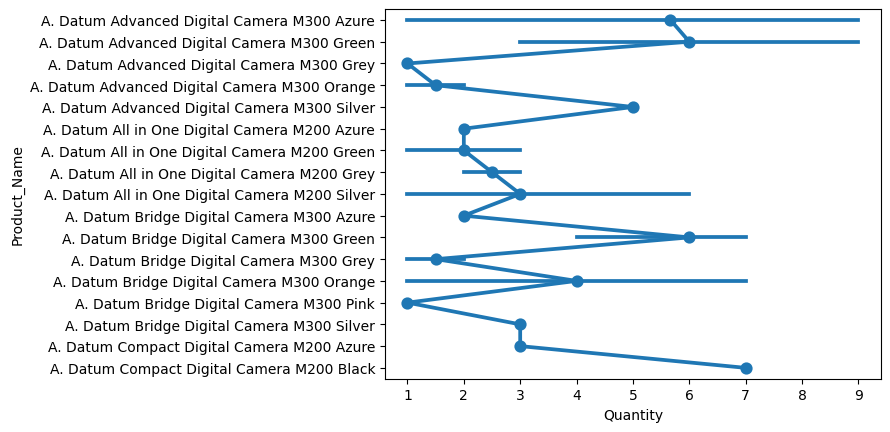

In [57]:
#Sales by Product: Evaluate which products are the top performers in terms of quantity sold and revenue generated.
stores_sales_prod_cust= merged_datas.sort_values('Product_Name',ascending=True).head(30)
sns.pointplot(x='Quantity',y='Product_Name',data=stores_sales_prod_cust)

<function matplotlib.pyplot.show(close=None, block=None)>

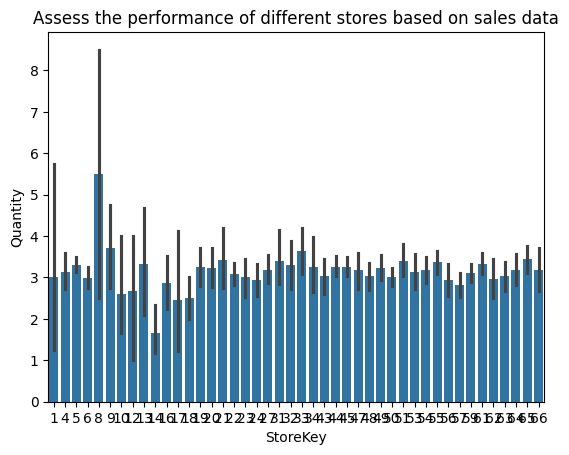

In [58]:
#Sales by Store: Assess the performance of different stores based on sales data.
sns.barplot(x='StoreKey',y='Quantity',data=merged_datas)
plt.title('Assess the performance of different stores based on sales data')
plt.xlabel('StoreKey')
plt.ylabel('Quantity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

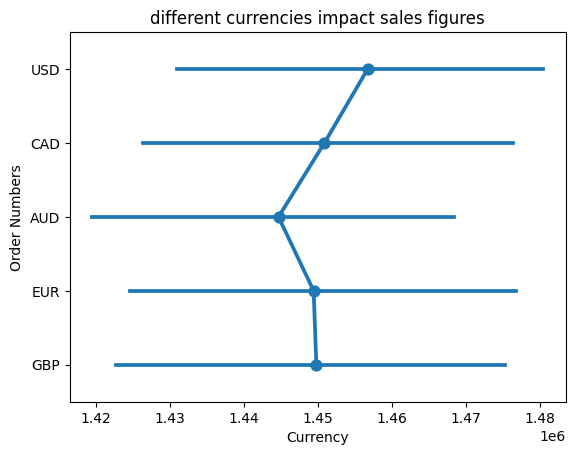

In [59]:
#Sales by Currency: Examine how different currencies impact sales figures, considering exchange rates.
sns.pointplot(x='Order_Number',y='Currency',data= merged_datas)
plt.title('different currencies impact sales figures')
plt.xlabel('Currency')
plt.ylabel('Order Numbers')
plt.show

Text(0, 0.5, 'products')

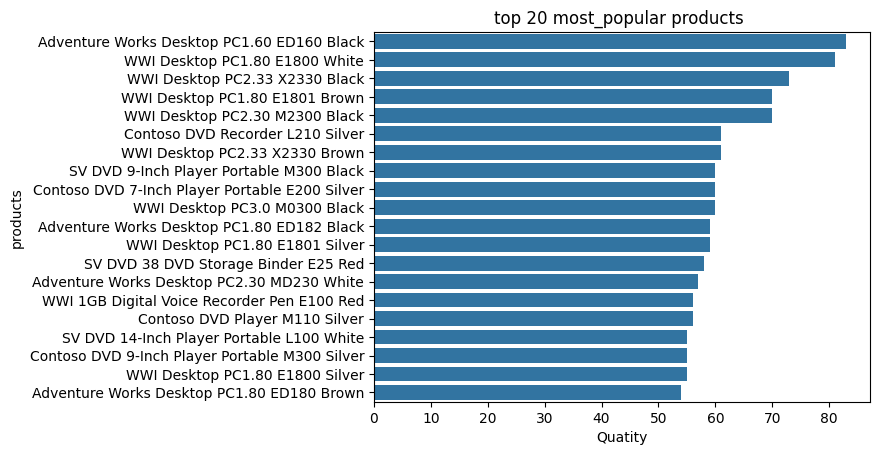

In [60]:
#Product Popularity: Identify the most and least popular products based on sales data.
product_sales = merged_datas.groupby('Product_Name')['Quantity'].sum()

most_popular = product_sales.sort_values(ascending=False).head(20)  
least_popular = product_sales.sort_values(ascending=True).head(20)

sns.barplot(x=most_popular.values,y=most_popular.index)
plt.title('top 20 most_popular products ')
plt.xlabel('Quatity')
plt.ylabel('products')

Text(0, 0.5, 'products')

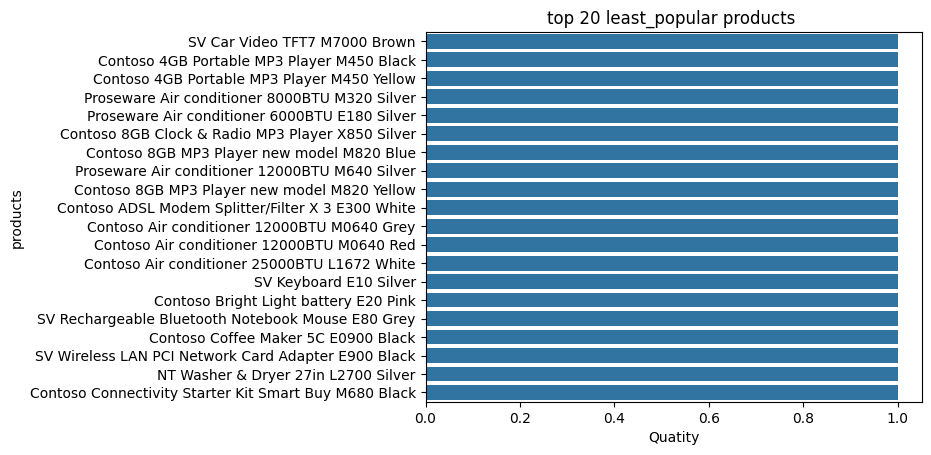

In [61]:
sns.barplot(x=least_popular.values,y=least_popular.index)
plt.title('top 20 least_popular products ')
plt.xlabel('Quatity')
plt.ylabel('products')

<function matplotlib.pyplot.show(close=None, block=None)>

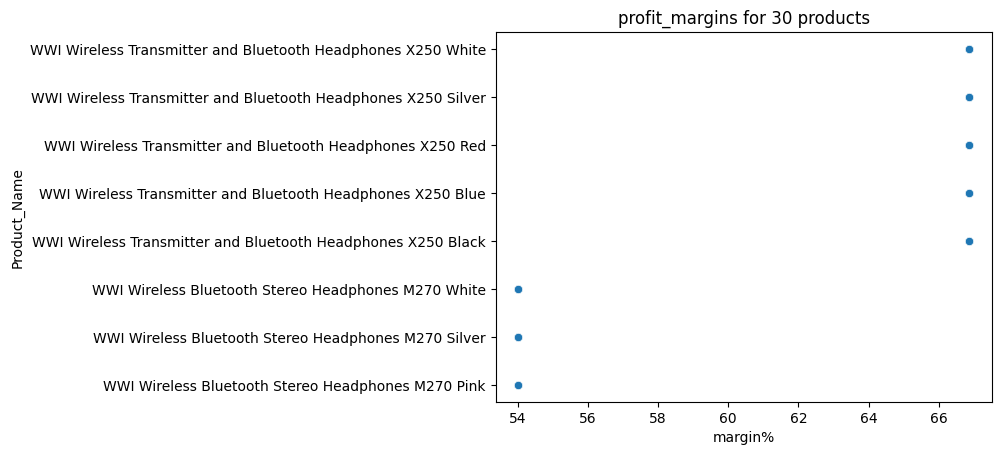

In [67]:
#Profitability Analysis: Calculate profit margins for products by comparing unit cost and unit price.

product=merged_datas.sort_values('Product_Name',ascending=False).head(50)
sns.scatterplot(x='profit_margin_per',y='Product_Name',data=product)
plt.title('profit_margins for 30 products')
plt.xlabel('margin%')
plt.ylabel('Product_Name')
plt.show

<Axes: ylabel='None'>

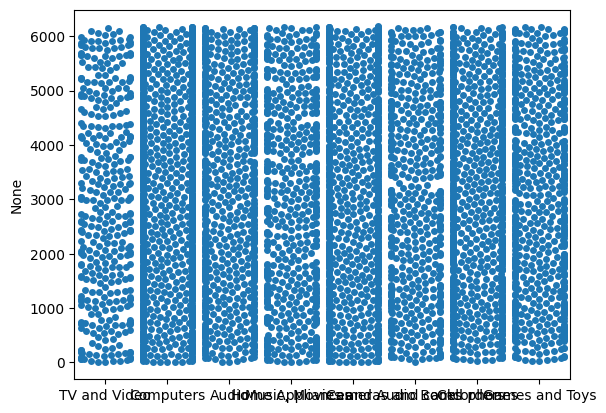

In [68]:
#Category Analysis: Analyze sales performance across different product categories and subcategories.
merged_datas['Product_Name'].unique()
cate=merged_datas['Category']
sub_cate=merged_datas['Subcategory']
sns.swarmplot(data=merged_datas,x=cate.values,y=cate.index)

<Axes: xlabel='StoreKey', ylabel='Quantity'>

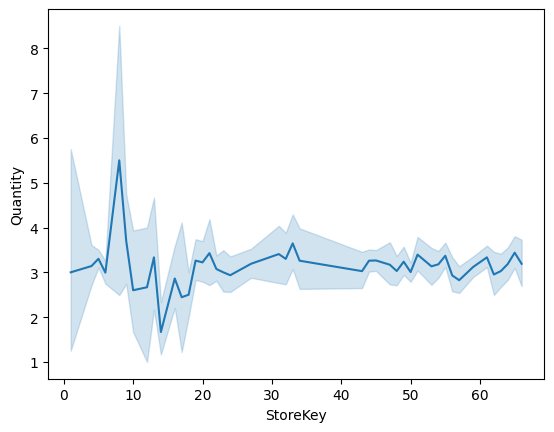

In [69]:
#Store Performance: Evaluate store performance based on sales, size (square meters), and operational data (open date).
sns.lineplot(x='StoreKey',y='Quantity',data=merged_datas)

<Axes: xlabel='StoreKey', ylabel='Square_Meters'>

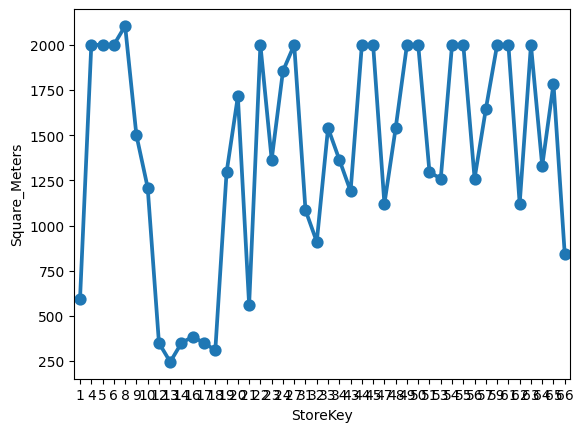

In [70]:
sns.pointplot(x='StoreKey',y='Square_Meters',data=merged_datas)

<Axes: xlabel='StoreKey', ylabel='Open_Date'>

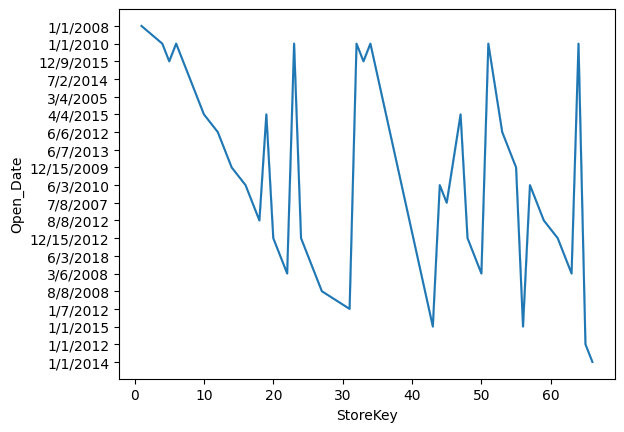

In [71]:
sns.lineplot(x='StoreKey',y='Open_Date',data=merged_datas)

<Axes: xlabel='Quantity', ylabel='State'>

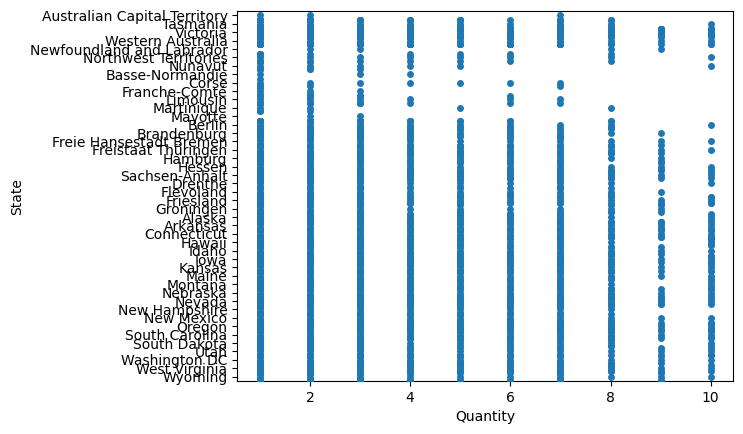

In [72]:
#Geographical Analysis: Analyze sales by store location to identify high-performing regions.
sns.swarmplot(x='Quantity',y='State',data=merged_datas)

In [ ]:
merged_datas['Date']=pd.to_datetime(merged_datas['Date'])
merged_datas['Open_Date']=pd.to_datetime(merged_datas['Open_Date'])

In [ ]:
import pymysql

In [ ]:
merged_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   StoreKey           6181 non-null   int64         
 1   Country            6181 non-null   object        
 2   State              6181 non-null   object        
 3   Square_Meters      6181 non-null   float64       
 4   Open_Date          6181 non-null   datetime64[ns]
 5   z_score            6181 non-null   float64       
 6   Order_Number       6181 non-null   int64         
 7   Line_Item          6181 non-null   int64         
 8   Order_Date         6181 non-null   datetime64[ns]
 9   Delivery_Date      6181 non-null   datetime64[ns]
 10  CustomerKey        6181 non-null   int64         
 11  ProductKey         6181 non-null   int64         
 12  Quantity           6181 non-null   int64         
 13  Currency_Code      6181 non-null   object        
 14  Product_

In [ ]:
mydb = pymysql.connect(
  host="localhost",
  user="root",
  port=3306,
  database="data_spark",
  password="Prem&11243"
)

In [ ]:
print(mydb)

In [ ]:
mycursor = mydb.cursor()
mycursor.execute("CREATE DATABASE data_spark")

1

In [ ]:
mycursor.execute("use data_spark")

0

In [ ]:
#mycursor.execute("""CREATE TABLE data (StoreKey INT(11) NOT NULL,Country VARCHAR(50) NOT NULL,State VARCHAR(50) NOT NULL,Square Meters INT(20) NOT NULL, Open Date DATE,  z_score DECIMAL(8,7) DEFAULT NULL, Order Number INT(20) NOT NULL,Line Item INT(20) NOT NULL,Order Date DATE,  Delivery Date DATE,CustomerKey INT(20) NOT NULL,ProductKey INT(20) NOT NULL,Quantity INT(20) NOT NULL,Currency Code VARCHAR(10) NOT NULL,Product Name VARCHAR(255) NOT NULL,Brand VARCHAR(50) NOT NULL,Color VARCHAR(255) NOT NULL,Unit Cost USD DECIMAL(10,2) DEFAULT NULL,Unit Price USD DECIMAL(10,2) DEFAULT NULL,SubcategoryKey VARCHAR(50) NOT NULL,Subcategory VARCHAR(50) NOT NULL,CategoryKey VARCHAR(50) NOT NULL,Category VARCHAR(50) NOT NULL,Gender VARCHAR(50) NOT NULL,Name VARCHAR(50) NOT NULL,City VARCHAR(50) NOT NULL,State Code VARCHAR(50) NOT NULL,Zip Code VARCHAR(50) NOT NULL,Continent VARCHAR(50) NOT NULL,Birthday DATE,age INT(20) NOT NULL,Date DATE,Currency VARCHAR(50) NOT NULL,Exchange DECIMAL(10,2) DEFAULT NULL,profit_margin% INT(20) NOT NULL)""")
   
   


In [ ]:
create_table_query = """
CREATE TABLE data (
    `StoreKey` INT NOT NULL,
    `Country` VARCHAR(50) NOT NULL,
    `State` VARCHAR(50) NOT NULL,
    `Square_Meters` INT NOT NULL,
    `Open_Date` DATE,
    `z_score` DECIMAL(8,7) DEFAULT NULL,
    `Order_Number` INT NOT NULL,
    `Line_Item` INT NOT NULL,
    `Order_Date` DATE,
    `Delivery_Date` DATE,
    `CustomerKey` INT NOT NULL,
    `ProductKey` INT NOT NULL,
    `Quantity` INT NOT NULL,
    `Currency_Code` VARCHAR(10) NOT NULL,
    `Product_Name` VARCHAR(255) NOT NULL,
    `Brand` VARCHAR(50) NOT NULL,
    `Color` VARCHAR(255) NOT NULL,
    `Unit_Cost_USD` DECIMAL(10,2) DEFAULT NULL,
    `Unit_Price_USD` DECIMAL(10,2) DEFAULT NULL,
    `SubcategoryKey` VARCHAR(50) NOT NULL,
    `Subcategory` VARCHAR(50) NOT NULL,
    `CategoryKey` VARCHAR(50) NOT NULL,
    `Category` VARCHAR(50) NOT NULL,
    `Gender` VARCHAR(50) NOT NULL,
    `Name` VARCHAR(50) NOT NULL,
    `City` VARCHAR(50) NOT NULL,
    `State_Code` VARCHAR(50) NOT NULL,
    `Zip_Code` VARCHAR(50) NOT NULL,
    `Continent` VARCHAR(50) NOT NULL,
    `Birthday` DATE,
    `age` INT NOT NULL,
    `Date` DATE,
    `Currency` VARCHAR(50) NOT NULL,
    `Exchange` DECIMAL(10,2) DEFAULT NULL,
    `profit_margin_per` INT NOT NULL
);
"""

In [ ]:
mycursor.execute(create_table_query )

0

In [ ]:
mycursor.execute("select * from data")

0

In [ ]:
tuples = list(merged_datas.itertuples(index=False, name=None))
tuples


[(1,
  'Australia',
  'Australian Capital Territory',
  595.0,
  Timestamp('2008-01-01 00:00:00'),
  1.411132463294909,
  1431023,
  1,
  Timestamp('2018-12-01 00:00:00'),
  Timestamp('2018-12-08 00:00:00'),
  37408,
  132,
  2,
  'AUD',
  'Adventure Works 20" Analog CRT TV E45 Brown',
  'Adventure Works',
  'Brown',
  101.97,
  200.0,
  201,
  'Televisions',
  2,
  'TV and Video',
  'Male',
  'Jaxon Rebell',
  'TORRENS',
  'ACT',
  '2607',
  'Australia',
  Timestamp('1975-10-11 00:00:00'),
  Timestamp('2015-01-01 00:00:00'),
  'USD',
  1.0,
  49,
  49.015),
 (1,
  'Australia',
  'Australian Capital Territory',
  595.0,
  Timestamp('2008-01-01 00:00:00'),
  1.411132463294909,
  1431023,
  2,
  Timestamp('2018-12-01 00:00:00'),
  Timestamp('2018-12-08 00:00:00'),
  37408,
  427,
  2,
  'AUD',
  'Adventure Works Desktop PC3.0 MS300 Black',
  'Adventure Works',
  'Black',
  215.68,
  469.0,
  303,
  'Desktops',
  3,
  'Computers',
  'Male',
  'Jaxon Rebell',
  'TORRENS',
  'ACT',
  '2607'

In [ ]:
merged_datas.columns


Index(['StoreKey', 'Country', 'State', 'Square_Meters', 'Open_Date', 'z_score',
       'Order_Number', 'Line_Item', 'Order_Date', 'Delivery_Date',
       'CustomerKey', 'ProductKey', 'Quantity', 'Currency_Code',
       'Product_Name', 'Brand', 'Color', 'Unit_Cost_USD', 'Unit_Price_USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Gender',
       'Name', 'City', 'State_Code', 'Zip_Code', 'Continent', 'Birthday',
       'Date', 'Currency', 'Exchange', 'age', 'profit_margin_per'],
      dtype='object')

In [ ]:
merged_datas.shape

(6181, 35)

In [ ]:
merged_datas

In [ ]:
merged_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   StoreKey           6181 non-null   int64         
 1   Country            6181 non-null   object        
 2   State              6181 non-null   object        
 3   Square_Meters      6181 non-null   float64       
 4   Open_Date          6181 non-null   datetime64[ns]
 5   z_score            6181 non-null   float64       
 6   Order_Number       6181 non-null   int64         
 7   Line_Item          6181 non-null   int64         
 8   Order_Date         6181 non-null   datetime64[ns]
 9   Delivery_Date      6181 non-null   datetime64[ns]
 10  CustomerKey        6181 non-null   int64         
 11  ProductKey         6181 non-null   int64         
 12  Quantity           6181 non-null   int64         
 13  Currency_Code      6181 non-null   object        
 14  Product_

In [ ]:
for rec in tuples:
    mycursor.execute( """
INSERT INTO data_spark.data (
    StoreKey, Country, State, Square_Meters, Open_Date, z_score,
    Order_Number, Line_Item, Order_Date, Delivery_Date,
    CustomerKey, ProductKey, Quantity, Currency_Code,
    Product_Name, Brand,Color, Unit_Cost_USD, Unit_Price_USD,
    SubcategoryKey, Subcategory, CategoryKey, Category, Gender,
    Name, City, State_Code, Zip_Code, Continent, Birthday,
    Date, Currency, Exchange, age, profit_margin_per 
) VALUES (
     %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s
)
""",
    rec
    )
    mydb.commit()
    print(f"{mycursor.rowcount} record Inserted")
    

1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record Inserted
1 record I

In [ ]:

    query_1="""
    SELECT 
            YEAR(Order_Date) AS Year,              
            SUM(Unit_Price_USD) AS TotalSales,       
            COUNT(Order_Number) AS TotalOrders,        
            AVG(Unit_Price_USD) AS AvgSalesPerOrder FROM data GROUP BY YEAR(Order_Date) ORDER BY Year;

    """
    query_2="""
    select  Product_Name,
	        max(Unit_Price_USD) as mostselled
            from data group by Product_Name order by mostselled desc limit 10;"""
    query_2_1=""" 
    select  Product_Name,        
       min(Unit_Price_USD)  as leastselled from data group by 
            Product_Name order by  leastselled asc limit 10;
    """ 
    query_3="""
    select year(Order_Date) as year, 
            Gender,
            count(*)as customer_count from data where Gender in ('Male','Female')
            group by year(Order_Date),Gender  order by year ,Gender  ;
    """
    query_4="""
    select profit_margin_per, 
            ProductKey from data 
            group by ProductKey,profit_margin_per 
            order by ProductKey asc  ;
    """ 
    query_5="""
    select Product_Name,StoreKey from data group by 
            Product_Name,StoreKey order by Storekey desc limit 50;
    """
    query_6="""
    SELECT DISTINCT Currency ,Quantity 
            FROM data  order by Quantity limit 30;
    """ 
    query_7="""
    SELECT YEAR(Order_Date) AS Year, 
            Product_Name, COUNT(*) AS Purchase_Frequency FROM data
            where Order_Date between '2021-01-01' AND '2021-12-31' 
            GROUP BY YEAR(Order_Date), Product_Name
            ORDER BY Purchase_Frequency DESC; 
    """ 
    query_8="""
    select YEAR(Order_Date) AS Year,              
            SUM(Unit_Price_USD) AS TotalpriceUSD,       
            Country from data group by YEAR(Order_Date),Country order by TotalpriceUSD desc ;
    """ 
    query_9="""
    SELECT StoreKey,Square_Meters from data group by 
           StoreKey,Square_Meters order by Square_Meters desc limit 5;
    """ 
    query_10="""
    SELECT Brand, 
            COUNT(*) AS Brand_Count FROM data GROUP BY Brand
            ORDER BY Brand_Count DESC
            LIMIT 30;
    """

In [ ]:
mycursor.execute(query_1)
mycursor.execute(query_2)
mycursor.execute(query_2_1)
mycursor.execute(query_3)
mycursor.execute(query_4)
mycursor.execute(query_5)
mycursor.execute(query_6)
mycursor.execute(query_7)
mycursor.execute(query_8)
mycursor.execute(query_9)
mycursor.execute(query_10)

11

In [ ]:
result = mycursor.fetchall()

In [ ]:
columns = [desc[0] for desc in mycursor.description]
    

In [ ]:
df = pd.DataFrame(result, columns=columns)

In [ ]:
queries = [
    {
        "query": """
            SELECT 
                YEAR(Order_Date) AS Year,              
                SUM(Unit_Price_USD) AS TotalSales,       
                COUNT(Order_Number) AS TotalOrders,        
                AVG(Unit_Price_USD) AS AvgSalesPerOrder 
            FROM data 
            GROUP BY YEAR(Order_Date) 
            ORDER BY Year;
        """,
        "file_name": "yearly_sales_summary1.csv"
    },
    {
        "query": """
            SELECT Product_Name,
                   MAX(Unit_Price_USD) AS mostselled
            FROM data 
            GROUP BY Product_Name 
            ORDER BY mostselled DESC 
            LIMIT 10;
        """,
        "file_name": "most_expensive_products2.csv"
    },
    {
        "query": """
            SELECT Product_Name,        
                   MIN(Unit_Price_USD) AS leastselled 
            FROM data 
            GROUP BY Product_Name 
            ORDER BY leastselled ASC 
            LIMIT 10;
        """,
        "file_name": "least_expensive_products2_1.csv"
    },
    {
        "query": """
            SELECT YEAR(Order_Date) AS year, 
                   Gender,
                   COUNT(*) AS customer_count 
            FROM data 
            WHERE Gender IN ('Male', 'Female')
            GROUP BY YEAR(Order_Date), Gender  
            ORDER BY year, Gender;
        """,
        "file_name": "gender_walkin3.csv"
    },
    {
        "query": """
            SELECT profit_margin_per, 
                   ProductKey 
            FROM data 
            GROUP BY ProductKey, profit_margin_per 
            ORDER BY ProductKey ASC 
            ;
        """,
        "file_name": "profit_margin_by_product4.csv"
    },
    {
        "query": """
            SELECT Product_Name, StoreKey 
            FROM data 
            GROUP BY Product_Name, StoreKey 
            ORDER BY StoreKey DESC 
            LIMIT 50;
        """,
        "file_name": "store_products5.csv"
    },
    {
        "query": """
            SELECT DISTINCT Currency, Quantity 
            FROM data  
            ORDER BY Quantity 
            LIMIT 30;
        """,
        "file_name": "sales_currencies6.csv"
    },
    {
        "query": """
            SELECT YEAR(Order_Date) AS Year, 
                   Product_Name, 
                   COUNT(*) AS Purchase_Frequency 
            FROM data
            WHERE Order_Date BETWEEN '2021-01-01' AND '2021-12-31'
            GROUP BY YEAR(Order_Date), Product_Name
            ORDER BY Purchase_Frequency DESC;
        """,
        "file_name": "product_purchase_frequency7.csv"
    },
    {
        "query": """
            SELECT YEAR(Order_Date) AS Year,              
                   SUM(Unit_Price_USD) AS TotalpriceUSD,       
                   Country 
            FROM data 
            GROUP BY YEAR(Order_Date), Country 
            ORDER BY TotalpriceUSD DESC;
        """,
        "file_name": "country_income_by_year8.csv"
    },
    {
        "query": """
            SELECT StoreKey, Square_Meters 
            FROM data 
            GROUP BY StoreKey, Square_Meters 
            ORDER BY Square_Meters DESC 
            LIMIT 5;
        """,
        "file_name": "store_square_meters9.csv"
    },
    {
        "query": """
            SELECT Brand, 
                   COUNT(*) AS Brand_Count 
            FROM data 
            GROUP BY Brand
            ORDER BY Brand_Count DESC
            LIMIT 30;
        """,
        "file_name": "top_brands10.csv"
    }
]

for item in queries:
    query = item["query"]
    file_name = item["file_name"]

    
    mycursor.execute(query)
    result = mycursor.fetchall()

        
    columns = [desc[0] for desc in mycursor.description]

    df = pd.DataFrame(result, columns=columns)
    df.to_csv(file_name, index=False)
    print(f"Saved results to {file_name}")
   

# Close database connection

Saved results to yearly_sales_summary1.csv
Saved results to most_expensive_products2.csv
Saved results to least_expensive_products2_1.csv
Saved results to gender_walkin3.csv
Saved results to profit_margin_by_product4.csv
Saved results to store_products5.csv
Saved results to sales_currencies6.csv
Saved results to product_purchase_frequency7.csv
Saved results to country_income_by_year8.csv
Saved results to store_square_meters9.csv
Saved results to top_brands10.csv


In [ ]:
#pip install sqlalchemy

In [ ]:
user="root"
host="localhost"
port=3306
database="data_spark"
password="Prem&11243"

In [ ]:
#mydb = pymysql.connect(
 # host="localhost",
  #user="root",
  #port=3306,
  #database="data_spark",
  #password="Prem&11243"
#)
#my_eng = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}", echo=False)


In [ ]:
stores_sales_prod_cust.columns

In [ ]:
#stores_sales_prod_cust.to_sql(name='data',con=my_eng,if_exists= 'append',index=False,method='multi', chunksize=1000)

In [ ]:
[0], 
    rec[1],
    rec[2], 
    rec[3],
    rec[4], 
    rec[5],
    rec[6], 
    rec[7], 
    rec[8], 
    rec[9],
    rec[10], 
    rec[11],
    rec[12],
    rec[13], 
    rec[14], 
    rec[15],
    rec[16],
    rec[17],
    rec[18],
    rec[19], 
    rec[20],
    rec[21], 
    rec[22], 
    rec[23],
    rec[24],
    rec[25],
    rec[26],
    rec[27],
    rec[28],
    rec[29],
    rec[30],
    rec[31], 
    rec[32],
    rec[33],
    rec[34] 